# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import random
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

   # city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [7]:
#api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()

print(f"downloading weather info for each selected city")

#creating holders for each of the fields to be received from the api call

cloudiness_array = []
country_array = []
date_array = []
humidity_array = []
lat_array = []
lng_array = []
max_temp_array = []
wind_speed_array = []
city_name_array = []

#create a counter for the received records starting with first record
city_ctr = 1

# Create a loop to store each record in the allocated arrays. This process could have been done in one step
# but to have clean code has been separated in getting the response first and then add it to the array.
for city in cities[:20]:
     response = requests.get(query_url + city).json() 
  
     try:         
        Cloudiness = response["clouds"]["all"]  
        Country = response["sys"]["country"]
        Date = response["dt"]        
        Humidity = response["main"]["humidity"]
        Lat = response["coord"]["lat"]
        Lng = response["coord"]["lon"]
        Temp_Max = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
        cloudiness_array.append(Cloudiness)
        country_array.append(Country)
        date_array.append(Date)
        humidity_array.append(Humidity)
        lat_array.append(Lat)
        lng_array.append(Lng)
        max_temp_array.append(Temp_Max)        
        wind_speed_array.append(Wind_Speed)
        city_name_array.append(city)
    
        #printing incoming records as they are downloaded
        print(f"Downloading Record ....{city_ctr} .... Country: {Country} ....City: {city}")
                                 
        # Increase counter by one 
        city_ctr += 1
        
        # create intervals of 1.2 between records to slow down the process from the api and avoid locking issues 
        time.sleep(0.5)
        
     #if no record is found then print an error message and continue    
     except:
         print("record not found")
        # continue
        

downloading weather info for each selected city


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dictionary
city_data_dictionary1 = {
    "City": city_name_array,
    "Cloudiness":cloudiness_array, 
    "Country":country_array,
    "Date":date_array, 
    "Humidity": humidity_array,
    "Lat":lat_array, 
    "Lng":lng_array, 
    "Max Temp": max_temp_array,
    "Wind Speed":wind_speed_array
}

#create data frame from dictionary
city_data1 = pd.DataFrame(city_data_dictionary1)
city_data1.count()

#store data in output csv file
city_data1.to_csv("../output_data/city_data1.csv")

# Display data frame head 
city_data1.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
15,bredasdorp,91,ZA,1587401454,63,-34.53,20.04,64.40,18.34
16,hobart,90,AU,1587401454,57,-42.88,147.33,52.00,9.17
17,saint-philippe,65,RE,1587401455,69,-21.36,55.77,77.00,16.11
18,dunedin,69,NZ,1587401457,75,-45.87,170.50,50.00,6.46
19,port alfred,24,ZA,1587401335,91,-33.59,26.89,66.99,14.14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

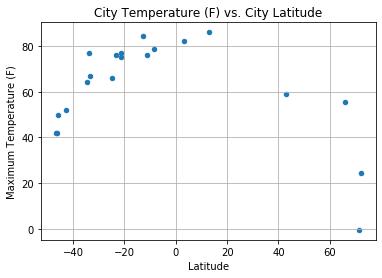

In [9]:
plt.scatter(city_data1["Lat"], city_data1["Max Temp"], marker="o", s=20)

plt.title("City Temperature (F) vs. City Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/Temperature_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

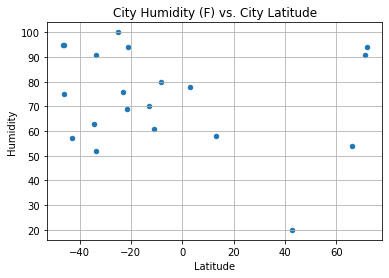

In [10]:
plt.scatter(city_data1["Lat"], city_data1["Humidity"], marker="o", s=20)

plt.title("City Humidity (F) vs. City Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

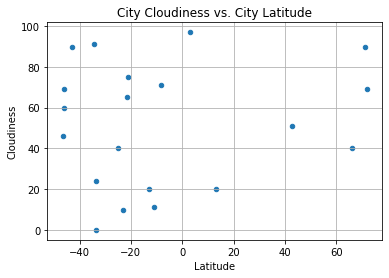

In [11]:
ts = time.gmtime(city_data1['Date'][0])
datestr = time.strftime("%x",ts)

plt.scatter(city_data1["Lat"], city_data1["Cloudiness"], marker="o", s=20)

plt.title("City Cloudiness vs. City Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

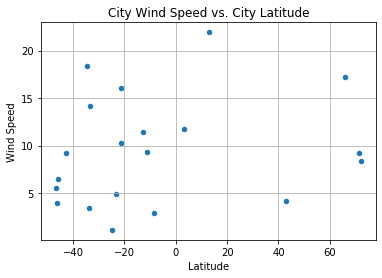

In [12]:
plt.scatter(city_data1["Lat"], city_data1["Wind Speed"], marker="o", s=20)

plt.title("City Wind Speed vs. City Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_wind_speed.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


y = -0.95x +93.75
The r-squared is: 0.7481712783079518


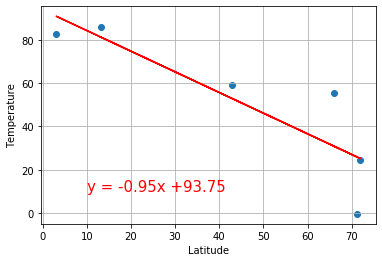

In [35]:
#create data frame from dictionary
lin_reg_df = pd.DataFrame(city_data_dictionary1)
lin_reg_df.count()

north= (lin_reg_df.loc[lin_reg_df["Lat"] >= 0])
north.reset_index(inplace=True)

south = (lin_reg_df.loc[lin_reg_df["Lat"] < 0])
south.reset_index(inplace=True)






x_val = north["Lat"]
y_val = north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

#find regression values
regress_values = x_val * slope + intercept

#find line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#plot and label data
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temperature')


plt.annotate(line_eq,(10,10),fontsize=15,color="red")

#print r square value
print(f"The r-squared is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression